In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [7]:
file_path = r"C:\Users\Prakruthi Reddy\Downloads\Sales_Forecasting_for_retail.csv"
df_preview = pd.read_csv(file_path, encoding='latin1')
print(df_preview.columns)

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')


In [8]:
# Load and inspect correct column name
file_path = r"C:\Users\Prakruthi Reddy\Downloads\Sales_Forecasting_for_retail.csv"
df = pd.read_csv(file_path, encoding='latin1', parse_dates=['Order Date'])
df.set_index('Order Date', inplace=True)

In [9]:
# Resample to monthly sales if needed (assumes daily/weekly data)
monthly_sales = df['Sales'].resample('M').sum()

In [10]:
# ADF Test for stationarity
result = adfuller(monthly_sales)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -4.493767844002665
p-value: 0.00020180198458237758


In [11]:
# Difference if not stationary
if result[1] > 0.05:
    monthly_sales_diff = monthly_sales.diff().dropna()
else:
    monthly_sales_diff = monthly_sales

In [12]:
# Fit ARIMA model (adjust order as needed)
model = ARIMA(monthly_sales, order=(1, 1, 1))
model_fit = model.fit()

# Forecast next 12 months
forecast = model_fit.forecast(steps=12)

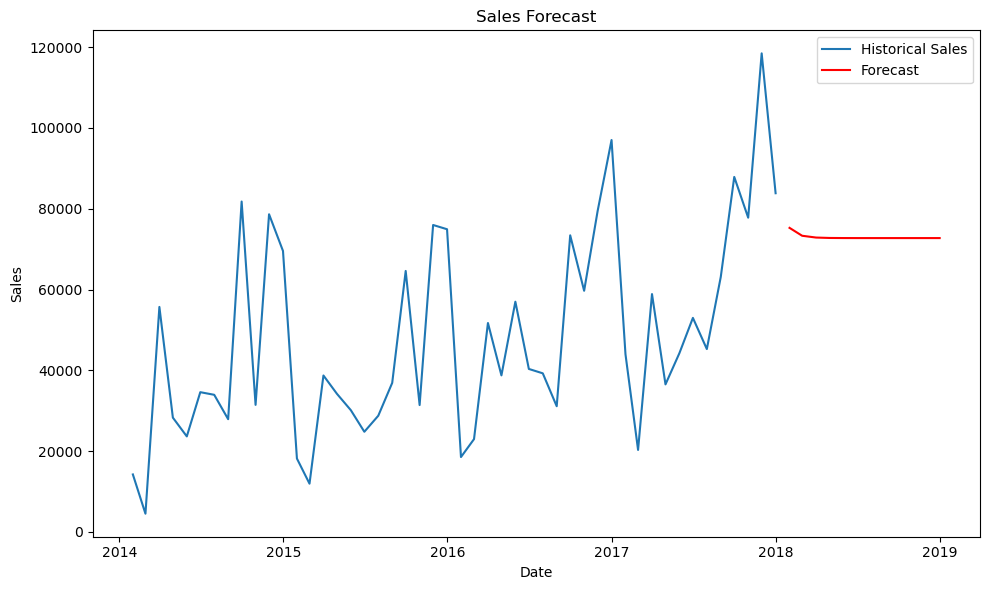

In [13]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales, label='Historical Sales')
plt.plot(forecast.index, forecast, label='Forecast', color='red')
plt.title('Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.tight_layout()
plt.show()

In [14]:
# Save forecast to CSV
forecast_df = pd.DataFrame({
    'Forecasted Sales': forecast
})

# Set a date index starting from the last date + 1 month
last_date = monthly_sales.index[-1]
forecast_df.index = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=12, freq='M')

# Save to CSV
output_path = r"C:\Users\Prakruthi Reddy\Downloads\Sales_Forecast_Output.csv"
forecast_df.to_csv(output_path)

print(f"Forecast saved to: {output_path}")

Forecast saved to: C:\Users\Prakruthi Reddy\Downloads\Sales_Forecast_Output.csv
